In [ ]:
from grade_classif.imports import *
from grade_classif.data.modules import ImageClassifDataModule

In [ ]:
dm = ImageClassifDataModule(
    Path("/data/DeepLearning/SCHWOB_Robin/Patches_cancer_1024/Patches_cancer_1024_1"),
    Path("/home/DeepLearning/grade_classif/csvs/scans.csv"),
    ["1", "3"],
    lambda x: x.parts[-3],
    sample_mode=2,
    max_patches_per_slide=100,
    size=1024,
    level=1,
    batch_size=64
)

In [ ]:
dm.setup()

In [ ]:
slides = np.unique(np.vectorize(lambda x: x.parent)(dm.data.train.items))

In [ ]:
dm.sample_mode = 2
dm.max_patches_per_slide = None
sampler = dm.train_dataloader().sampler
sampler.replacement = True
slide_counts = {slide: 0 for slide in slides}
grade_counts = {"1": 0, "3": 0}
for _ in range(10):
    for k in sampler:
        fn = dm.data.train.items[k]
        slide_counts[fn.parent] += 1
        grade_counts[fn.parts[-3]] += 1

In [ ]:
grade_counts

{'1': 245993, '3': 246287}

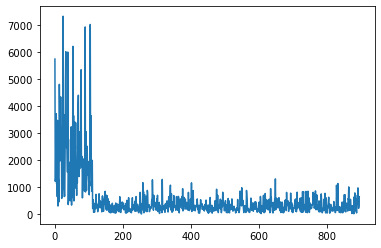

In [ ]:
plt.plot(slide_counts.values())

(array([759.,  73.,  22.,  13.,  15.,   4.,   3.,   2.,   3.,   3.]),
 array([3.0000e+00, 7.3620e+02, 1.4694e+03, ..., 5.8686e+03, 6.6018e+03,
        7.3350e+03]),
 <BarContainer object of 10 artists>)

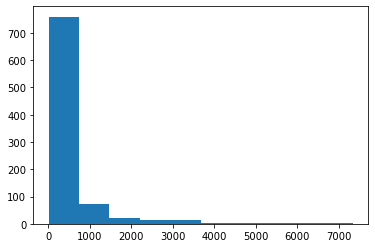

In [ ]:
plt.hist(slide_counts.values())